## Project Setup 

In [41]:
import sys
import os

# Add the project root to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [42]:
from src.constants import (

    FASHION_TRAIN_DATA_PATH,
    FASHION_TEST_DATA_PATH,
    FASHION_LOGISTIC_MODEL_PATH,
    FASHION_KMEANS_MODEL_PATH
    
)

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load Dataset - First Phase

In [43]:
train_df = pd.read_csv(FASHION_TRAIN_DATA_PATH)
test_df = pd.read_csv(FASHION_TEST_DATA_PATH)

### Remove Classes to keep only 5 Classes

In [44]:
classes_to_remove = [0, 2, 4, 6, 7]
train_df = train_df[~train_df['label'].isin(classes_to_remove)]
test_df = test_df[~test_df['label'].isin(classes_to_remove)]

# EDA - Second Phase

### Fashion-MNIST images are 28x28 pixels → 784 features (plus 1 label)

In [45]:
train_df.head(7)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0
11,8,0,0,0,0,0,0,0,0,0,...,9,10,9,9,8,1,0,0,0,0
12,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1. Structure of dataset

In [46]:
# train dataset
f"images No.: {train_df.shape[0]} , pixels per image: {train_df.shape[1]}"

'images No.: 30000 , pixels per image: 785'

In [47]:
# test dataset
f"images No.: {test_df.shape[0]} , pixels per image: {test_df.shape[1]}"

'images No.: 5000 , pixels per image: 785'

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 59998
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 179.9 MB


##### Columns are int64 datatype. 

In [49]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.00000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5.200000,0.000733,0.005733,0.015267,0.049967,0.163567,0.313900,0.598333,1.253700,3.021600,...,33.613000,18.311100,11.13390,8.25560,7.024933,5.285367,3.702233,2.712333,1.230433,0.096033
std,2.993376,0.094515,0.347042,1.370339,2.108337,3.715078,5.525304,7.850681,12.095727,18.428857,...,58.907194,45.407374,36.66405,32.56075,30.440496,26.137761,21.591918,18.343567,11.661921,2.536341
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,51.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,36.000000,226.000000,150.000000,224.000000,213.000000,221.000000,255.000000,243.000000,...,255.000000,255.000000,255.00000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


## 2. Check values

In [50]:
train_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

##### As we see , there are columns we can't know if itis null or not , so we will count it again , but by True/False method . To count True Null values :

In [51]:
# any -> True , sum -> count
train_df.isnull().any().sum()

np.int64(0)

In [52]:
test_df.isnull().any().sum()

np.int64(0)

In [53]:
train_df.duplicated().sum()

np.int64(9)

In [54]:
test_df.duplicated().sum()

np.int64(0)

##### Duplicated columns : 43 , we can remove it in preprocessing phase .

## 3. Understand target column

In [55]:
train_df['label'].unique()

array([9, 3, 5, 8, 1])

##### Classes from 0 -> 9

In [56]:
train_df['label'].value_counts()

label
9    6000
3    6000
5    6000
8    6000
1    6000
Name: count, dtype: int64

## 4. Distribution of Target Column

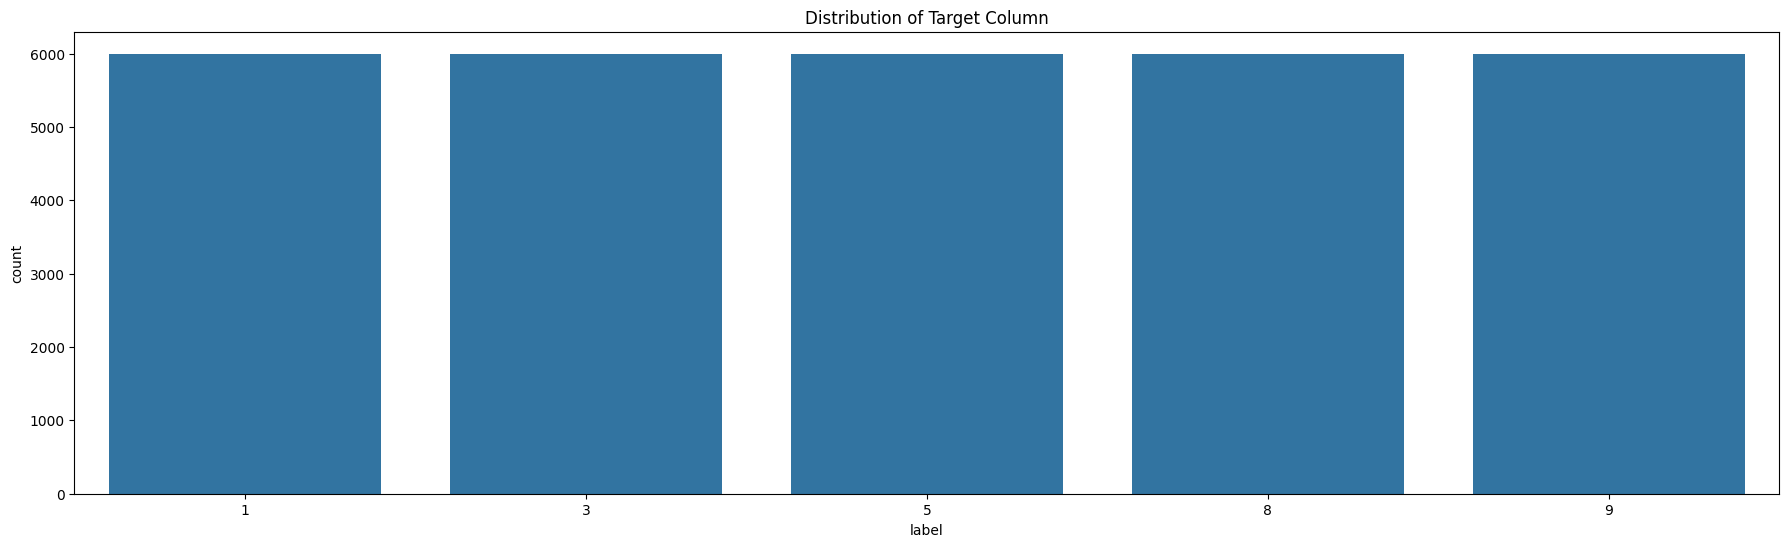

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(22,6))

ax = sns.countplot( data=train_df, x='label')
plt.title("Distribution of Target Column")
plt.show()

##### All labels has same distribution , not imbalanced data . which is good 

# Preprocessing & Feature Engineering - Third Phase

##### We will start with removing duplicates 

In [58]:
train_df.drop_duplicates(inplace=True)

In [59]:
test_df.drop_duplicates(inplace=True)

In [60]:
train_df.duplicated().sum() , test_df.duplicated().sum()

(np.int64(0), np.int64(0))

#### Handle Nulls 

In [61]:
train_df.dropna()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0
11,8,0,0,0,0,0,0,0,0,0,...,9,10,9,9,8,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0


In [62]:
test_df.dropna()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3,0,0,0,0,0,0,0,1,0,...,12,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9993,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## HOG Feature Extraction

### Our images is 28 * 28 , which means 785 features , which mean also 785 weight to calculate . which is  very large for traditional ml models .
#### So we need to reduce these 785 and also choose the important features only , to make the model train well . 

#### for this we use HOG ( histogram orianted gradient ) that extracts the important features in image . then we can use also PCA later to reduce it more if needed . 

## Hog Train

In [63]:
from skimage.feature import hog
import numpy as np

X = train_df.drop(columns=["label"]).values

train_images = X.reshape(-1, 28, 28)

hog_train_features = []
for img in train_images:
    fd = hog(
        img,
        orientations=12,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )
    hog_train_features.append(fd)

hog_train_features = np.array(hog_train_features)
print("HOG Train shape:", hog_train_features.shape)

HOG Train shape: (29991, 192)


## Hog Test

In [64]:
X_hog_test = test_df.drop(columns=["label"]).values

test_images = X_hog_test.reshape(-1, 28, 28)

hog_test_features = []
for img in test_images:
    fd = hog(
        img,
        orientations=12,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )
    hog_test_features.append(fd)

hog_test_features = np.array(hog_test_features)
print("HOG Test shape:", hog_test_features.shape)

HOG Test shape: (5000, 192)


### Save Hog feature into Dataframe 

##### Train Dataframe

In [65]:
hog_train_df = pd.DataFrame(hog_train_features, columns=[f"pixel{i}" for i in range(hog_train_features.shape[1])])

y = train_df["label"]

final_train_df = pd.concat([hog_train_df, y.reset_index(drop=True)], axis=1)


#### Test Dataframe

In [66]:
hog_test_df = pd.DataFrame(hog_test_features, columns=[f"pixel{i}" for i in range(hog_test_features.shape[1])])

y = test_df["label"]

final_test_df = pd.concat([hog_test_df, y.reset_index(drop=True)], axis=1)

## Feature Engineering & Scale
#### based on "we have only numerical feature ", so we don't need other transformer other scalar.

In [67]:
numeric_columns = hog_train_df.columns 

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
            ('scaler', StandardScaler(),numeric_columns)
    ]
)

#### Column transformer usually we use it for grouping some processing on dataset to make more easy to perform on train & test , use it in pipeline also with model training . 

### But because we have only numeric feature , so we don't should use it . but it is useful .

## Training Pipelines

### Logistic Regression

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=180)),
    ('classifier', LogisticRegression(max_iter=2000, C=0.1, solver='saga', penalty='l1'))
])

### KMeans

In [70]:
from sklearn.cluster import KMeans

kmeans_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=180)),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

# Training - Fourth Phase

## On Logistic Regression

In [71]:
from sklearn.model_selection import train_test_split

X = final_train_df.drop(columns=['label'])
y = final_train_df['label']

# Split the data into training and validation sets
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_val = final_test_df.drop(columns=['label'])
y_val = final_test_df['label']

# Fit the pipeline on the training data
logistic_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Evaluation - Last Phase

### Accuracy of training / Validation data

In [72]:
from sklearn.metrics import accuracy_score

# Predict on validation set
y_val_pred = logistic_pipeline.predict(X_val)


val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.9746


### Confusion Matrix & Report

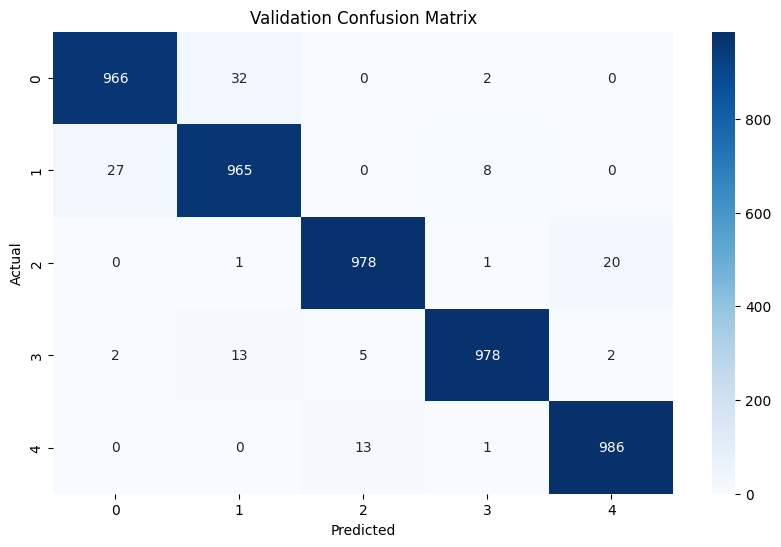


Classification Report of Train/Validation:

              precision    recall  f1-score   support

           1       0.97      0.97      0.97      1000
           3       0.95      0.96      0.96      1000
           5       0.98      0.98      0.98      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.99      0.98      1000

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



In [73]:
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

print("\nClassification Report of Train/Validation:\n")
print(classification_report(y_val,y_val_pred))

### ROC 

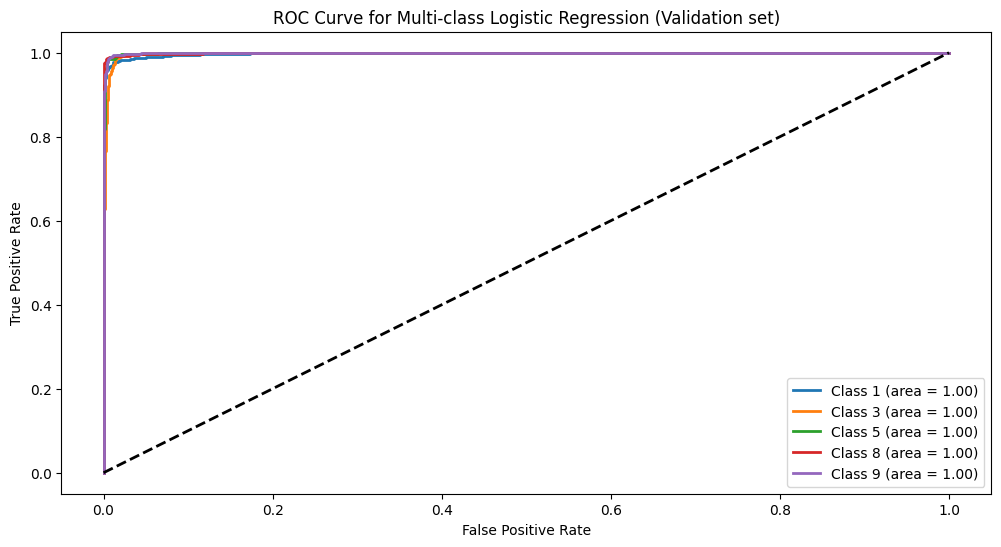

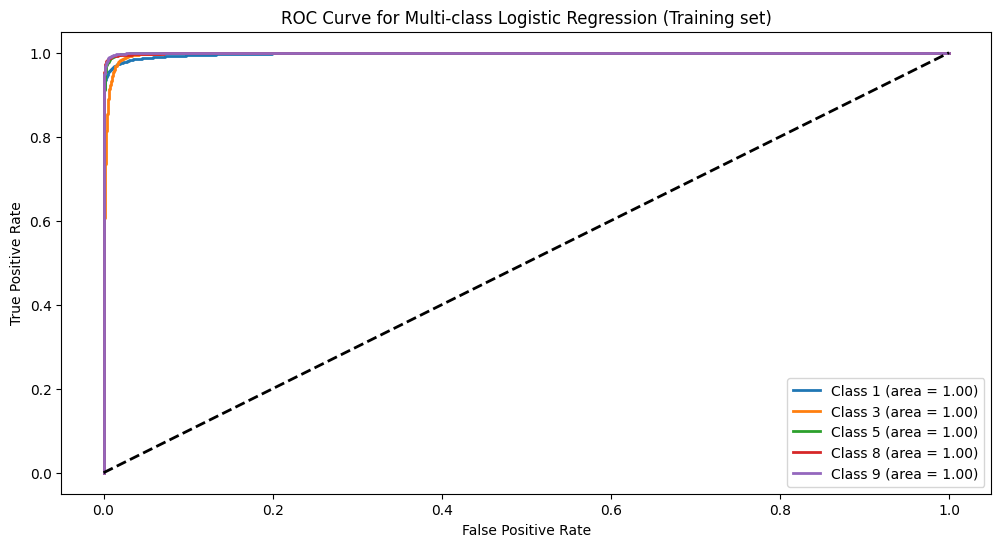

In [74]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

remaining_classes = [1, 3, 5,  8, 9]

# Binarize the output labels for multi-class ROC
y_val_bin = label_binarize(y_val, classes=remaining_classes) 
y_train_bin = label_binarize(y_train, classes=remaining_classes)

# Predict probabilities
y_val_proba = logistic_pipeline.predict_proba(X_val)
y_train_proba = logistic_pipeline.predict_proba(X_train)

plt.figure(figsize=(12, 6))

for i in range(len(remaining_classes)):
    fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_val_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {remaining_classes[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Logistic Regression (Validation set)')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(12, 6))
for i in range(len(remaining_classes)):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_train_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {remaining_classes[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Logistic Regression (Training set)')
plt.legend(loc='lower right')
plt.show()


## On KMeans

In [75]:
X = final_train_df.drop(columns=['label'])

kmeans_pipeline.fit(X)

,steps,"[('preprocessor', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Accuracy

In [76]:
# Train clusters
k_means_train = final_train_df.drop(columns=['label'])
y_means_train = final_train_df['label']
train_clusters = kmeans_pipeline.predict(k_means_train)

# Test clusters
k_means_test = final_test_df.drop(columns=['label'], errors='ignore')
y_means_test = final_test_df['label']
test_clusters = kmeans_pipeline.predict(k_means_test)

In [77]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

print("Train ARI:", adjusted_rand_score(y_means_train, train_clusters))
print("Train NMI:", normalized_mutual_info_score(y_means_train, train_clusters))


print("Test ARI:", adjusted_rand_score(y_means_test, test_clusters))
print("Test NMI:", normalized_mutual_info_score(y_means_test, test_clusters))

Train ARI: 0.6552561806846309
Train NMI: 0.6985906513032493
Test ARI: 0.655192794117312
Test NMI: 0.6988131830222759


## Cross-Validation

In [ ]:
from sklearn.model_selection import  cross_val_score

cv_scores = cross_val_score(logistic_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

#### Save models

In [ ]:
import joblib

joblib.dump(logistic_pipeline,FASHION_LOGISTIC_MODEL_PATH)
joblib.dump(kmeans_pipeline,FASHION_KMEANS_MODEL_PATH)

print("Pipeline saved successfully!")

Pipeline saved successfully!


In [ ]:
final_train_df['label'].unique()

array([9, 3, 5, 8, 1])